In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

Project Description

Who doesn’t love food? All of us must have craving for at least a few favourite food items, we may also have a few places where we like to get them, a restaurant which serves our favourite food the way we want it to be. But there is one factor that will make us reconsider having our favourite food from our favourite restaurant, the cost. Here in this hackathon, you will be predicting the cost of the food served by the restaurants across different cities in India. You will use your Data Science skills to investigate the factors that really affect the cost, and who knows maybe you will even gain some very interesting insights that might help you choose what to eat and from where.

You are provided with following 2 files:
1.     train.csv : Use this dataset to train the model. This file contains all the details related to restaurant food cost as well as the target variable “cost”. You have to train your model using this file.
2.     test.csv : Use the trained model to predict the cost of a two person meal.

Dataset Attributes
TITLE: The feature of the restaurant which can help identify what and for whom it is suitable for.
RESTAURANT_ID: A unique ID for each restaurant.
CUISINES: The variety of cuisines that the restaurant offers.
TIME: The open hours of the restaurant.
CITY: The city in which the restaurant is located.
LOCALITY: The locality of the restaurant.
RATING: The average rating of the restaurant by customers.
VOTES: The overall votes received by the restaurant.
COST: The average cost of a two-person meal.


In [103]:
df=pd.read_excel(r"C:\Users\VIKAS\restaurant_Data_Train.xlsx")

In [104]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49 votes,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30 votes,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221 votes,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24 votes,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165 votes,300


In [105]:
df.shape

(12690, 9)

There are 12690 rows in 9 columns in this dataset

In [106]:
df=df.drop_duplicates()

In [107]:
df.shape

(12665, 9)

After removing duplicate values I got 12665 rows and 9 columns

In [108]:
#Removing text 'votes' from VOTES columns
df['VOTES']=df['VOTES'].str.replace('votes','')

In [109]:
df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,COST
0,CASUAL DINING,9438,"Malwani, Goan, North Indian","11am – 4pm, 7:30pm – 11:30pm (Mon-Sun)",Thane,Dombivali East,3.6,49,1200
1,"CASUAL DINING,BAR",13198,"Asian, Modern Indian, Japanese",6pm – 11pm (Mon-Sun),Chennai,Ramapuram,4.2,30,1500
2,CASUAL DINING,10915,"North Indian, Chinese, Biryani, Hyderabadi","11am – 3:30pm, 7pm – 11pm (Mon-Sun)",Chennai,Saligramam,3.8,221,800
3,QUICK BITES,6346,"Tibetan, Chinese",11:30am – 1am (Mon-Sun),Mumbai,Bandra West,4.1,24,800
4,DESSERT PARLOR,15387,Desserts,11am – 1am (Mon-Sun),Mumbai,Lower Parel,3.8,165,300


In [110]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          12665 non-null  object
 1   RESTAURANT_ID  12665 non-null  int64 
 2   CUISINES       12665 non-null  object
 3   TIME           12665 non-null  object
 4   CITY           12553 non-null  object
 5   LOCALITY       12567 non-null  object
 6   RATING         12663 non-null  object
 7   VOTES          11465 non-null  object
 8   COST           12665 non-null  int64 
dtypes: int64(2), object(7)
memory usage: 989.5+ KB


There are 7 object and 2 int64 datatypes. RATING & VOTES columns need to change the data type

In [111]:
df.isnull().sum()

TITLE               0
RESTAURANT_ID       0
CUISINES            0
TIME                0
CITY              112
LOCALITY           98
RATING              2
VOTES            1200
COST                0
dtype: int64

There are some null values present in this dataset

In [112]:
#Checking the unique value counts in every columns.
for i in df.columns:
    print(df[i].value_counts(), "\n")

QUICK BITES                 4211
CASUAL DINING               3645
None                        1000
CAFÉ                         606
DESSERT PARLOR               381
                            ... 
QUICK BITES,BAR                1
MEAT SHOP                      1
BEVERAGE SHOP,FOOD COURT       1
SWEET SHOP,CONFECTIONERY       1
BAR,MICROBREWERY               1
Name: TITLE, Length: 113, dtype: int64 

7264     8
4634     7
9910     6
7745     5
4058     5
        ..
11517    1
7773     1
9982     1
13577    1
6134     1
Name: RESTAURANT_ID, Length: 11892, dtype: int64 

South Indian                                532
North Indian                                524
North Indian, Chinese                       500
Fast Food                                   286
Chinese                                     167
                                           ... 
BBQ, Rolls                                    1
Italian, North Indian, Chinese, Salad         1
Andhra, Seafood, Biryani                

In [113]:
#Filling Null values
df['VOTES']=df['VOTES'].fillna(df['VOTES'].mode()[0])

In [114]:
df['LOCALITY']=df['LOCALITY'].fillna(df['LOCALITY'].mode()[0])

In [115]:
df['CITY']=df['CITY'].fillna(df['CITY'].mode()[0])

In [117]:
#Changing data type of VOTES & RATING columns
df['VOTES']=df['VOTES'].astype(int)
df['RATING']=pd.to_numeric(df['RATING'], errors='coerce')

In [118]:
df['RATING']=df['RATING'].fillna(df['RATING'].mean())

In [119]:
df.isnull().sum()

TITLE            0
RESTAURANT_ID    0
CUISINES         0
TIME             0
CITY             0
LOCALITY         0
RATING           0
VOTES            0
COST             0
dtype: int64

In [120]:
df['VOTES'].dtypes

dtype('int32')

In [121]:
df['RATING'].dtypes

dtype('float64')

I have converted data type of Votes and Rating columns

In [122]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 12665 entries, 0 to 12689
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE          12665 non-null  object 
 1   RESTAURANT_ID  12665 non-null  int64  
 2   CUISINES       12665 non-null  object 
 3   TIME           12665 non-null  object 
 4   CITY           12665 non-null  object 
 5   LOCALITY       12665 non-null  object 
 6   RATING         12665 non-null  float64
 7   VOTES          12665 non-null  int32  
 8   COST           12665 non-null  int64  
dtypes: float64(1), int32(1), int64(2), object(5)
memory usage: 940.0+ KB


In [123]:
#Checking the unique value in every columns.
for i in df.columns:
    print(df[i].unique(),"\n")

['CASUAL DINING' 'CASUAL DINING,BAR' 'QUICK BITES' 'DESSERT PARLOR' 'CAFÉ'
 'MICROBREWERY' 'QUICK BITES,BEVERAGE SHOP' 'CASUAL DINING,IRANI CAFE'
 'BAKERY,QUICK BITES' 'None' 'BAR,CASUAL DINING' 'BAR' 'PUB'
 'BEVERAGE SHOP' 'FINE DINING' 'CAFÉ,QUICK BITES'
 'BEVERAGE SHOP,DESSERT PARLOR' 'SWEET SHOP,QUICK BITES'
 'DESSERT PARLOR,SWEET SHOP' 'BAKERY' 'BAKERY,DESSERT PARLOR' 'BAR,LOUNGE'
 'FOOD COURT' 'LOUNGE' 'DESSERT PARLOR,BEVERAGE SHOP'
 'LOUNGE,CASUAL DINING' 'FOOD TRUCK' 'QUICK BITES,FOOD COURT' 'SWEET SHOP'
 'BEVERAGE SHOP,FOOD COURT' 'PUB,CASUAL DINING' 'MESS'
 'MICROBREWERY,CASUAL DINING' 'CASUAL DINING,SWEET SHOP' 'KIOSK'
 'QUICK BITES,KIOSK' 'CLUB' 'FINE DINING,BAR' 'DESSERT PARLOR,QUICK BITES'
 'FOOD COURT,QUICK BITES' 'LOUNGE,CAFÉ' 'BAKERY,CONFECTIONERY'
 'CASUAL DINING,CAFÉ' 'DHABA' 'CAFÉ,DESSERT PARLOR'
 'QUICK BITES,DESSERT PARLOR' 'PUB,MICROBREWERY' 'LOUNGE,BAR'
 'DESSERT PARLOR,CAFÉ' 'CAFÉ,BAR' 'SWEET SHOP,CONFECTIONERY'
 'CASUAL DINING,PUB' 'MICROBREWERY,BAR' 'DESSERT 

I have converted data type of Votes and Rating columns

In [125]:
df.describe()

,RESTAURANT_ID,RATING,VOTES,COST
count,12665.000000,12665.000000,12665.000000,12665.000000
mean,7757.774734,3.785251,380.411607,655.400790
std,4506.166393,0.401782,809.716694,627.389831
min,0.000000,2.000000,4.000000,20.000000
25%,3861.000000,3.600000,44.000000,300.000000
50%,7739.000000,3.800000,132.000000,500.000000
75%,11689.000000,4.000000,405.000000,800.000000
max,15573.000000,4.900000,41186.000000,14000.000000


In [126]:
c_col=[]
n_col=[]
for i in df.dtypes.index:
    if df.dtypes[i]=='object':
        c_col.append(i)
    else:
        n_col.append(i)

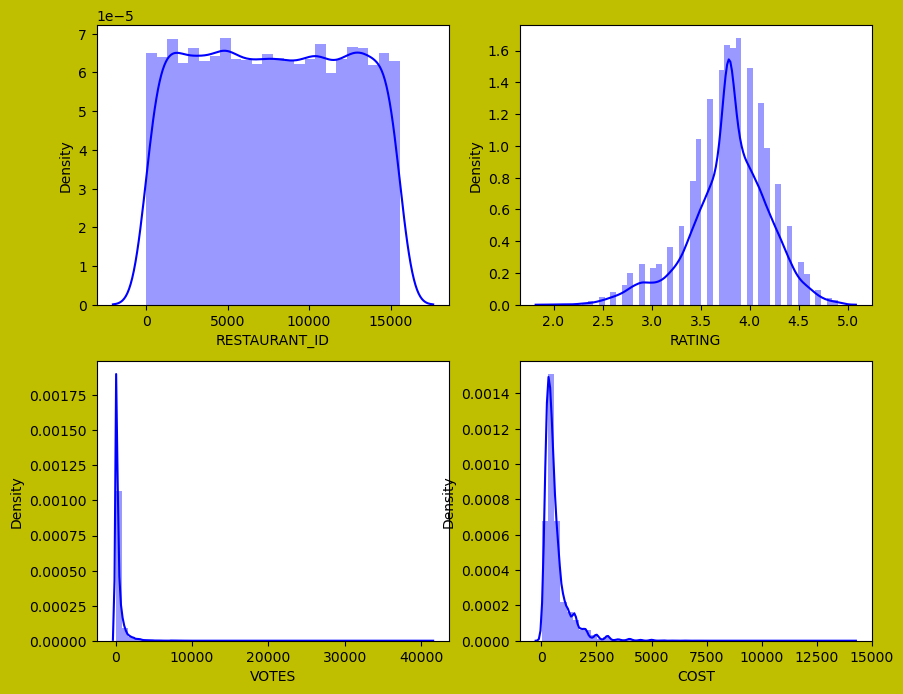

In [127]:
#Checking outliers in the continues data through distplot
plt.figure(figsize=(10,8), facecolor='y')
plotnumber=1

for i in n_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

Thear are outliers in VOTES columns and need to address this issue

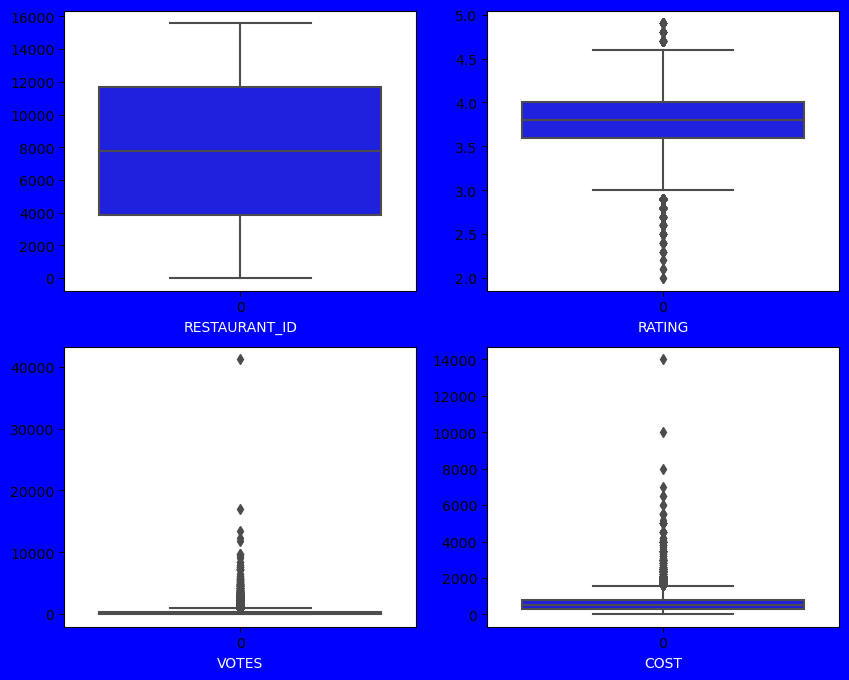

In [129]:
plt.figure(figsize=(10,8), facecolor='blue')
plotnumber=1

for i in n_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=10, color='w')
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In box plot I can see there are some outlieres in RATINGS & VOTES columns

In [130]:
from scipy.stats import zscore

In [131]:
z_score=zscore(df[['RATING','VOTES']])

In [132]:
abs_z_score=np.abs(z_score)

In [133]:
filter_entry=(abs_z_score<2.5).all(axis=1)

In [134]:
df=df[filter_entry]

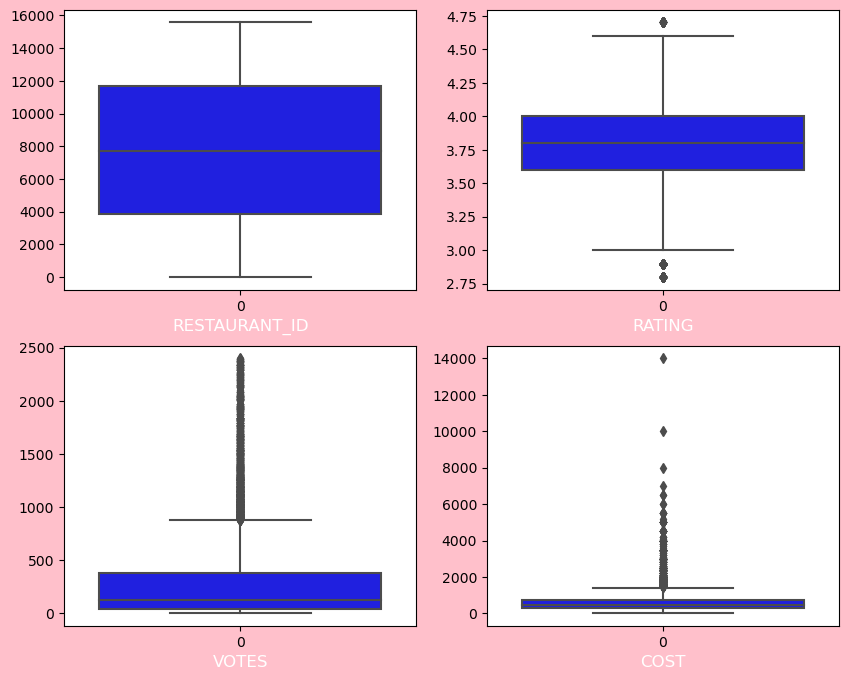

In [135]:
plt.figure(figsize=(10,8), facecolor='pink')
plotnumber=1

for i in n_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.boxplot(df[i], color='b')
        plt.xlabel(i, fontsize=12, color='w')
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

I manage to remove some outliers from VOTES and RATING Columns

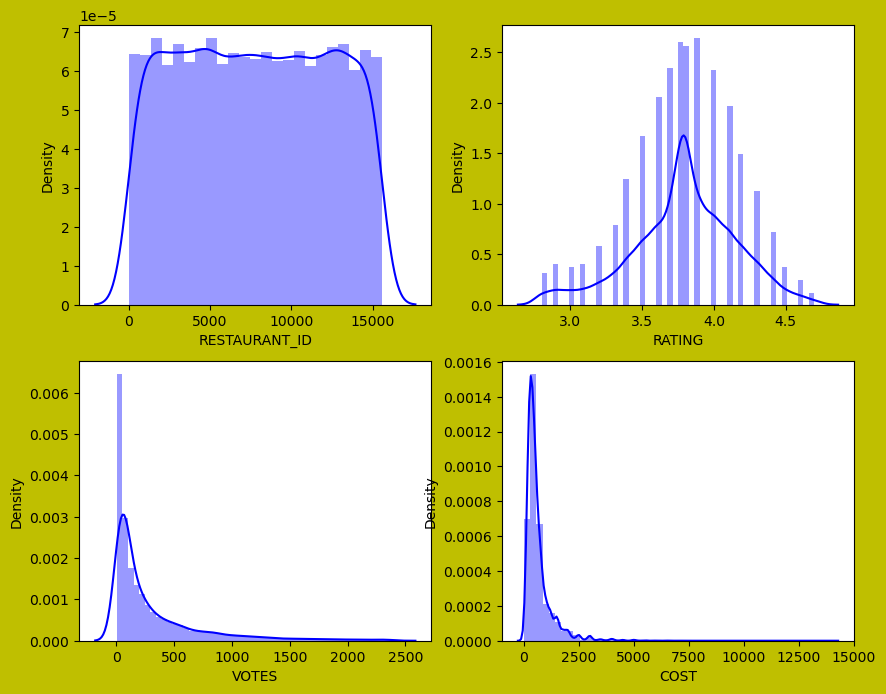

In [136]:
plt.figure(figsize=(10,8), facecolor='y')
plotnumber=1

for i in n_col:
    if plotnumber<=4:
        ax=plt.subplot(2,2,plotnumber)
        sns.distplot(df[i], color='b')
        plt.xlabel(i, fontsize=10)
        plt.yticks(rotation=0, fontsize=10)
    plotnumber+=1
plt.show()

In [141]:
#converting categoriacl data into continues data by using Binary encoder technique
from category_encoders import BinaryEncoder

In [142]:
col=['CITY','CUISINES','LOCALITY','TIME','TITLE']

In [149]:
df['CITY']

0              Thane
1            Chennai
2            Chennai
3             Mumbai
4             Mumbai
            ...     
12685      Hyderabad
12686         Mumbai
12687    Navi Mumbai
12688        Chennai
12689      Hyderabad
Name: CITY, Length: 12138, dtype: object

In [143]:
bi_en=BinaryEncoder()

In [154]:
df_city=bi_en.fit_transform(df)

In [156]:
df_city.head()

,TITLE_0,TITLE_1,TITLE_2,TITLE_3,TITLE_4,TITLE_5,TITLE_6,RESTAURANT_ID,CUISINES_0,CUISINES_1,...,LOCALITY_4,LOCALITY_5,LOCALITY_6,LOCALITY_7,LOCALITY_8,LOCALITY_9,LOCALITY_10,RATING,VOTES,COST
0,0,0,0,0,0,0,1,9438,0,0,...,0,0,0,0,0,0,1,3.6,49,1200
1,0,0,0,0,0,1,0,13198,0,0,...,0,0,0,0,0,1,0,4.2,30,1500
2,0,0,0,0,0,0,1,10915,0,0,...,0,0,0,0,0,1,1,3.8,221,800
3,0,0,0,0,0,1,1,6346,0,0,...,0,0,0,0,1,0,0,4.1,24,800
4,0,0,0,0,1,0,0,15387,0,0,...,0,0,0,0,1,0,1,3.8,165,300


In [158]:
df=df_city

In [159]:
df.shape

(12138, 55)

In [160]:
df.head()

,TITLE_0,TITLE_1,TITLE_2,TITLE_3,TITLE_4,TITLE_5,TITLE_6,RESTAURANT_ID,CUISINES_0,CUISINES_1,...,LOCALITY_4,LOCALITY_5,LOCALITY_6,LOCALITY_7,LOCALITY_8,LOCALITY_9,LOCALITY_10,RATING,VOTES,COST
0,0,0,0,0,0,0,1,9438,0,0,...,0,0,0,0,0,0,1,3.6,49,1200
1,0,0,0,0,0,1,0,13198,0,0,...,0,0,0,0,0,1,0,4.2,30,1500
2,0,0,0,0,0,0,1,10915,0,0,...,0,0,0,0,0,1,1,3.8,221,800
3,0,0,0,0,0,1,1,6346,0,0,...,0,0,0,0,1,0,0,4.1,24,800
4,0,0,0,0,1,0,0,15387,0,0,...,0,0,0,0,1,0,1,3.8,165,300


In [161]:
#Dividing independent and dependent columns in to two variables i.e. x & y.
x=df.drop('COST', axis=1)
y=df.COST

In [162]:
from sklearn.preprocessing import StandardScaler
scalar=StandardScaler()

In [163]:
x_scaled=scalar.fit_transform(x)

In [164]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

In [165]:
#Checking if there is any multicollinearity problem in columns by using VIF technique.
vif=pd.DataFrame()
vif['vif']=[variance_inflation_factor (x_scaled, i) for i in range(x_scaled.shape[1])]
vif['feature']=x.columns
vif

,vif,feature
0,1.022488,TITLE_0
1,1.133643,TITLE_1
2,1.142471,TITLE_2
3,1.174670,TITLE_3
4,1.379623,TITLE_4
5,1.181567,TITLE_5
6,1.473738,TITLE_6
7,1.005782,RESTAURANT_ID
8,1.167591,CUISINES_0
9,1.160625,CUISINES_1


There is no any multicollinearity issue in this dataset

In [166]:
from sklearn.model_selection import train_test_split as tts
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor as KNN
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [167]:
mxacc=0
mxrs=0

for i in range(1, 200):
    x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.30, random_state=i)
    lr=LinearRegression()
    lr.fit(x_train, y_train)
    pred=lr.predict(x_test)
    acc=r2_score(y_test, pred)
    if acc>mxacc:
        mxacc=acc
        mxrs=i
print("Best Accuracy score is :", mxacc, "at Random_state :", mxrs)

Best Accuracy score is : 0.36394197618624513 at Random_state : 47


In [168]:
x_train, x_test, y_train, y_test=tts(x_scaled, y, test_size=0.30, random_state=i)

In [169]:
def metric_score(clf,x_train, x_test, y_train, y_test, train=True):
    if train:
        y_pred=clf.predict(x_train)
        print('\n===============================train result==============')
        print(f'R2 Score:{r2_score(y_train,y_pred)*100:2f}%')
           
    elif train==False:
        ypred=clf.predict(x_test)
        
        print('\n===============================test result==============')
        print(f'R2 Score:{r2_score(y_test,ypred)*100:2f}%')
            
        print("\nMean Absolute Error:", mean_absolute_error(y_test,ypred))
        print("\nMean Squared Error:", mean_squared_error(y_test,ypred))
        print("\nRoot Mean Squared Error:", np.sqrt(mean_squared_error(y_test,ypred)))

In [170]:
lr=LinearRegression()
rfr=RandomForestRegressor()
dtr=DecisionTreeRegressor()
knn=KNN()
lso=Lasso()
rdg=Ridge()
etr=ExtraTreesRegressor()
svr=SVR()
gbr=GradientBoostingRegressor()

In [171]:
models={'RandomForestRegressor':rfr,'DecisionTreeRegressor':dtr,'KNN':knn,'Lasso':lso,'Ridge':rdg,'ExtraTreesRegressor':etr,'SVR':svr,'GradientBoostingRegressor':gbr}

In [172]:
#Now I am training all models by using for look.
for name, model in models.items():
    model.fit(x_train, y_train)
    print('Model Name is :', name)
    metric_score(model,x_train, x_test, y_train, y_test, train=True)
    metric_score(model,x_train, x_test, y_train, y_test, train=False)
    print('\n')

Model Name is : RandomForestRegressor

===============================train result==============
R2 Score:95.190560%

===============================test result==============
R2 Score:65.733473%

Mean Absolute Error: 208.27831411312465

Mean Squared Error: 120254.95918693025

Root Mean Squared Error: 346.777968139457


Model Name is : DecisionTreeRegressor

===============================train result==============
R2 Score:100.000000%

===============================test result==============
R2 Score:0.867754%

Mean Absolute Error: 295.79159802306424

Mean Squared Error: 347894.7306425041

Root Mean Squared Error: 589.8260172648406


Model Name is : KNN

===============================train result==============
R2 Score:66.250682%

===============================test result==============
R2 Score:46.826450%

Mean Absolute Error: 251.11219110378912

Mean Squared Error: 186607.26984074683

Root Mean Squared Error: 431.9806359557646


Model Name is : Lasso

===============================

RandomForestRegressor model has givin good score. So, I am checking Cross validation score in RandomForestRegressor model.

In [173]:
from sklearn.model_selection import cross_val_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import roc_curve, roc_auc_score, auc

In [174]:
score=cross_val_score(rfr, x_scaled,y)

In [175]:
ypred=rfr.predict(x_test)

In [177]:
print("Difference between r2 score & Cross Validation Score is", r2_score(y_test,ypred)-(score.mean()))

Difference between accuracy score & Cross Validation Score is -0.005525825103407156


There is very less diffrence between Cross Vlaidation score and RandomForestRegressor score. Now I am Tunning the parameters by using GridSearch CV

In [179]:
from sklearn.model_selection import GridSearchCV

In [202]:
param={'n_estimators': [4,6],
       'max_depth':[10,15,20],
      'min_samples_split':[10,11,12],
      'min_samples_leaf':[5,6,7]}

In [203]:
grd=GridSearchCV(rfr, param_grid=param)

In [204]:
grd.fit(x_train, y_train)

GridSearchCV(estimator=RandomForestRegressor(),
             param_grid={'max_depth': [10, 15, 20],
                         'min_samples_leaf': [5, 6, 7],
                         'min_samples_split': [10, 11, 12],
                         'n_estimators': [4, 6]})

In [205]:
grd.best_params_

{'max_depth': 10,
 'min_samples_leaf': 5,
 'min_samples_split': 11,
 'n_estimators': 6}

In [212]:
final_model=RandomForestRegressor(max_depth=10, min_samples_leaf=5, min_samples_split=11, n_estimators=6)

In [213]:
final_model.fit(x_train, y_train)
pred=final_model.predict(x_test)
acc=r2_score(y_test, pred)

In [214]:
acc

0.6185748390068835

In [215]:
import joblib
joblib.dump(final_model,'Restaurant Food Cost.pkl')

['Restaurant Food Cost.pkl']

In [247]:
test_df=pd.read_excel(r"C:\Users\VIKAS\restaurant_Data_Test.xlsx")

In [248]:
test_df.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes


In [218]:
test_df.shape

(4231, 8)

In [220]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 8 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   TITLE          4231 non-null   object
 1   RESTAURANT_ID  4231 non-null   int64 
 2   CUISINES       4231 non-null   object
 3   TIME           4231 non-null   object
 4   CITY           4196 non-null   object
 5   LOCALITY       4201 non-null   object
 6   RATING         4229 non-null   object
 7   VOTES          3829 non-null   object
dtypes: int64(1), object(7)
memory usage: 264.6+ KB


In [221]:
test_df.isnull().sum()

TITLE              0
RESTAURANT_ID      0
CUISINES           0
TIME               0
CITY              35
LOCALITY          30
RATING             2
VOTES            402
dtype: int64

In [249]:
test_df['CITY']=test_df['CITY'].fillna(test_df['CITY'].mode()[0])

In [250]:
test_df['LOCALITY']=test_df['LOCALITY'].fillna(test_df['LOCALITY'].mode()[0])

In [251]:
test_df['VOTES']=test_df['VOTES'].fillna(test_df['VOTES'].mode()[0])

In [254]:
test_df['RATING']=test_df['RATING'].fillna(test_df['RATING'].mean())

In [239]:
test_df.isnull().sum()

TITLE_0          0
TITLE_1          0
TITLE_2          0
TITLE_3          0
TITLE_4          0
TITLE_5          0
TITLE_6          0
RESTAURANT_ID    0
CUISINES_0       0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
CUISINES_9       0
CUISINES_10      0
TIME_0           0
TIME_1           0
TIME_2           0
TIME_3           0
TIME_4           0
TIME_5           0
TIME_6           0
TIME_7           0
TIME_8           0
TIME_9           0
TIME_10          0
CITY_0           0
CITY_1           0
CITY_2           0
CITY_3           0
CITY_4           0
CITY_5           0
CITY_6           0
CITY_7           0
LOCALITY_0       0
LOCALITY_1       0
LOCALITY_2       0
LOCALITY_3       0
LOCALITY_4       0
LOCALITY_5       0
LOCALITY_6       0
LOCALITY_7       0
LOCALITY_8       0
LOCALITY_9       0
RATING           0
VOTES            0
dtype: int64

In [252]:
#Removing text 'votes' from VOTES columns
test_df['VOTES']=test_df['VOTES'].str.replace('votes','')

In [253]:
#Changing data type of VOTES & RATING columns
test_df['VOTES']=test_df['VOTES'].astype(int)
test_df['RATING']=pd.to_numeric(test_df['RATING'], errors='coerce')

In [241]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4231 entries, 0 to 4230
Data columns (total 50 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   TITLE_0        4231 non-null   int64  
 1   TITLE_1        4231 non-null   int64  
 2   TITLE_2        4231 non-null   int64  
 3   TITLE_3        4231 non-null   int64  
 4   TITLE_4        4231 non-null   int64  
 5   TITLE_5        4231 non-null   int64  
 6   TITLE_6        4231 non-null   int64  
 7   RESTAURANT_ID  4231 non-null   int64  
 8   CUISINES_0     4231 non-null   int64  
 9   CUISINES_1     4231 non-null   int64  
 10  CUISINES_2     4231 non-null   int64  
 11  CUISINES_3     4231 non-null   int64  
 12  CUISINES_4     4231 non-null   int64  
 13  CUISINES_5     4231 non-null   int64  
 14  CUISINES_6     4231 non-null   int64  
 15  CUISINES_7     4231 non-null   int64  
 16  CUISINES_8     4231 non-null   int64  
 17  CUISINES_9     4231 non-null   int64  
 18  CUISINES

In [256]:
dftest=bi_en.fit_transform(test_df)

In [257]:
dftest

,TITLE_0,TITLE_1,TITLE_2,TITLE_3,TITLE_4,TITLE_5,TITLE_6,RESTAURANT_ID,CUISINES_0,CUISINES_1,...,LOCALITY_2,LOCALITY_3,LOCALITY_4,LOCALITY_5,LOCALITY_6,LOCALITY_7,LOCALITY_8,LOCALITY_9,RATING,VOTES
0,0,0,0,0,0,0,1,4085,0,0,...,0,0,0,0,0,0,0,1,4.300000,564
1,0,0,0,0,0,1,0,12680,0,0,...,0,0,0,0,0,0,1,0,4.200000,61
2,0,0,0,0,0,0,1,1411,0,0,...,0,0,0,0,0,0,1,1,3.800000,350
3,0,0,0,0,0,1,1,204,0,0,...,0,0,0,0,0,1,0,0,3.800000,1445
4,0,0,0,0,0,1,0,13453,0,0,...,0,0,0,0,0,1,0,1,3.600000,23
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4226,0,0,0,0,0,0,1,9057,0,0,...,1,0,1,1,0,0,0,1,3.900000,287
4227,0,0,0,0,0,1,1,1247,1,0,...,0,0,0,0,1,0,1,1,4.300000,469
4228,0,0,0,0,0,1,0,8617,1,0,...,0,1,0,0,0,0,0,1,3.700000,53
4229,0,0,0,0,0,1,0,6485,1,1,...,0,1,1,1,1,0,0,1,3.781536,6


In [258]:
test_df=dftest

In [263]:
test_df.insert(19,'CUISINES_11', True)
test_df.insert(31,'TIME_11',  True)
test_df.insert(40,'CITY_8',  True)
test_df.insert(51,'LOCALITY_10', True)

In [266]:
test_df.shape

(4231, 54)

In [268]:
test_df.isnull().sum()

TITLE_0          0
TITLE_1          0
TITLE_2          0
TITLE_3          0
TITLE_4          0
TITLE_5          0
TITLE_6          0
RESTAURANT_ID    0
CUISINES_0       0
CUISINES_1       0
CUISINES_2       0
CUISINES_3       0
CUISINES_4       0
CUISINES_5       0
CUISINES_6       0
CUISINES_7       0
CUISINES_8       0
CUISINES_9       0
CUISINES_10      0
CUISINES_11      0
TIME_0           0
TIME_1           0
TIME_2           0
TIME_3           0
TIME_4           0
TIME_5           0
TIME_6           0
TIME_7           0
TIME_8           0
TIME_9           0
TIME_10          0
TIME_11          0
CITY_0           0
CITY_1           0
CITY_2           0
CITY_3           0
CITY_4           0
CITY_5           0
CITY_6           0
CITY_7           0
CITY_8           0
LOCALITY_0       0
LOCALITY_1       0
LOCALITY_2       0
LOCALITY_3       0
LOCALITY_4       0
LOCALITY_5       0
LOCALITY_6       0
LOCALITY_7       0
LOCALITY_8       0
LOCALITY_9       0
LOCALITY_10      0
RATING      

In [265]:
test_df.head()

,TITLE_0,TITLE_1,TITLE_2,TITLE_3,TITLE_4,TITLE_5,TITLE_6,RESTAURANT_ID,CUISINES_0,CUISINES_1,...,LOCALITY_3,LOCALITY_4,LOCALITY_5,LOCALITY_6,LOCALITY_7,LOCALITY_8,LOCALITY_9,LOCALITY_10,RATING,VOTES
0,0,0,0,0,0,0,1,4085,0,0,...,0,0,0,0,0,0,1,True,4.3,564
1,0,0,0,0,0,1,0,12680,0,0,...,0,0,0,0,0,1,0,True,4.2,61
2,0,0,0,0,0,0,1,1411,0,0,...,0,0,0,0,0,1,1,True,3.8,350
3,0,0,0,0,0,1,1,204,0,0,...,0,0,0,0,1,0,0,True,3.8,1445
4,0,0,0,0,0,1,0,13453,0,0,...,0,0,0,0,1,0,1,True,3.6,23


In [276]:
ynew = final_model.predict(test_df)

In [278]:
cost_of_two_person=pd.DataFrame(ynew)

In [279]:
cost_of_two_person

,0
0,1063.208981
1,449.069232
2,1063.208981
3,449.069232
4,366.535670
...,...
4226,1119.697712
4227,646.217136
4228,538.674088
4229,475.744048


In [280]:
mealcost=pd.read_excel(r"C:\Users\VIKAS\restaurant_Data_Test.xlsx")

In [281]:
mealcost['cost_of_meal']=cost_of_two_person

In [282]:
mealcost.head()

,TITLE,RESTAURANT_ID,CUISINES,TIME,CITY,LOCALITY,RATING,VOTES,cost_of_meal
0,CASUAL DINING,4085,"North Indian, Chinese, Mughlai, Kebab",12noon – 12midnight (Mon-Sun),Noida,Sector 18,4.3,564 votes,1063.208981
1,QUICK BITES,12680,"South Indian, Fast Food, Pizza, North Indian",7am – 12:30AM (Mon-Sun),Mumbai,Grant Road,4.2,61 votes,449.069232
2,CASUAL DINING,1411,"North Indian, Seafood, Biryani, Chinese",11am – 11:30pm (Mon-Sun),Mumbai,Marine Lines,3.8,350 votes,1063.208981
3,None,204,Biryani,"9am – 10pm (Mon, Wed, Thu, Fri, Sat, Sun), 10:...",Faridabad,NIT,3.8,1445 votes,449.069232
4,QUICK BITES,13453,"South Indian, Kerala",11am – 10pm (Mon-Sun),Kochi,Kaloor,3.6,23 votes,366.535670
